# Author : Venkadasubramanian Jayakumar

## Task 2: Prediction using SUnsupervised Machine Learning

## GRIP @ The Sparks Foundation
> - Find the optimum number of clusters for the given dataset and present the cluster visually.

In [58]:
#install yellowbrick to visulaize the Elbow curve and Shilloutte plot
# !pip install yellowbrick

## Import Necessary Libraries

In [85]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

In [64]:
#Load the IRIS dataset
iris = datasets.load_iris()
X = pd.DataFrame(data=iris.data,columns=iris.feature_names)
y = pd.DataFrame(data=iris.target,columns= ['Actual_Cluster'])

#Load dataset as pandas dataframe
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
y.head()

,Actual_Cluster
0,0
1,0
2,0
3,0
4,0


## Find optimum cluster

### Method 1a:

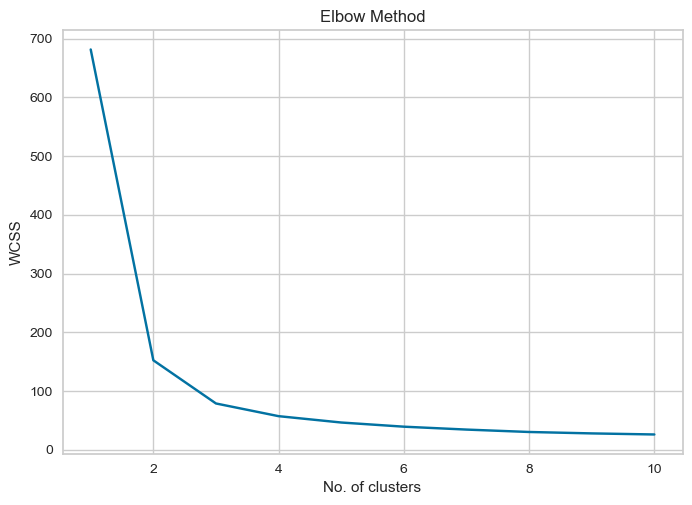

In [66]:
#Find the optimum number of cluster using SKlearn K means clustering elbow method

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, to observe 'The elbow'
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS') #within cluster sume of squares
plt.show()

### Method 1b:

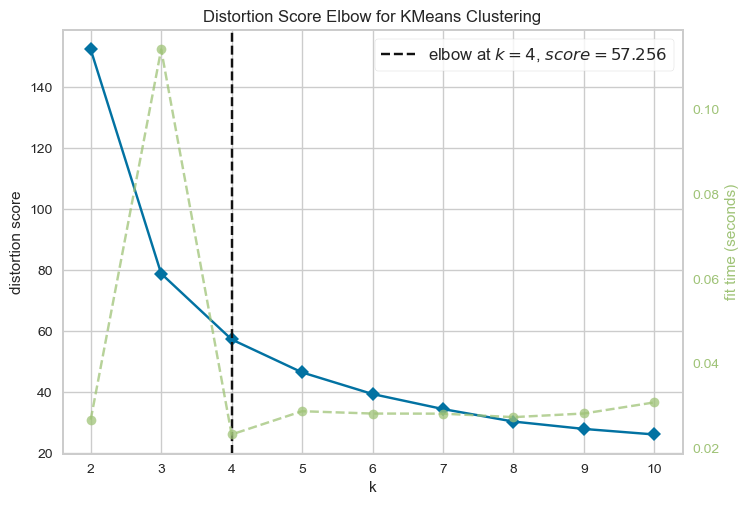

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
#Find the optimum number of cluster using yellowbrick's visualizer
visualizer = KElbowVisualizer(kmeans)
visualizer.fit(X)
visualizer.show()

### Method 2

For n_cluster = 2 The average silhouette_score is : 0.6810461692117462
For n_cluster = 3 The average silhouette_score is : 0.5528190123564095
For n_cluster = 4 The average silhouette_score is : 0.4974551890173751
For n_cluster = 5 The average silhouette_score is : 0.4887488870931056


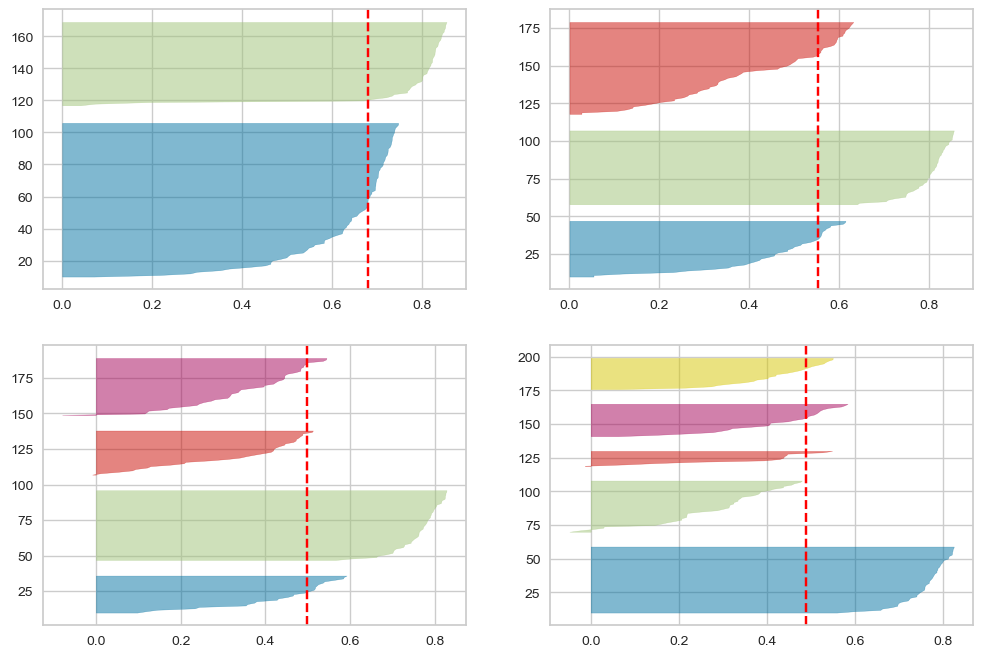

In [68]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
for i,a in zip([2,3,4,5],ax.flatten()):
    kmeans = KMeans(n_clusters=i,random_state=123)
    visualizer = SilhouetteVisualizer(kmeans,colors='yellowbrick',ax=a)
    visualizer.fit(X)
    print(f"For n_cluster = {i} The average silhouette_score is : {visualizer.silhouette_score_}")

- For a particular K, all the clusters should have the silhouette score more than the average score (denoted by red dotted line) Thus, K=4 and K=5 shall be rejected.
- Also the ditribution of the data in each cluster has to be more or less equal where as for K=2 blue cluster is twice the size of green and it does not meet the condition.
- For K=3 all the cluster silhouetter score are more than avegare and also width of each cluster are uniform. Hence K=3 is the optimal cluster size.

## Visualizing the Model Cluster


In [183]:
kmeans_model = KMeans(n_clusters=3,random_state=123)
kmeans_model.fit(X)
y_pred = kmeans_model.fit_predict(X)
# y_pred = pd.DataFrame(y_pred,columns=['Predicted'])

Text(0.5, 1.0, 'After K means Clustering')

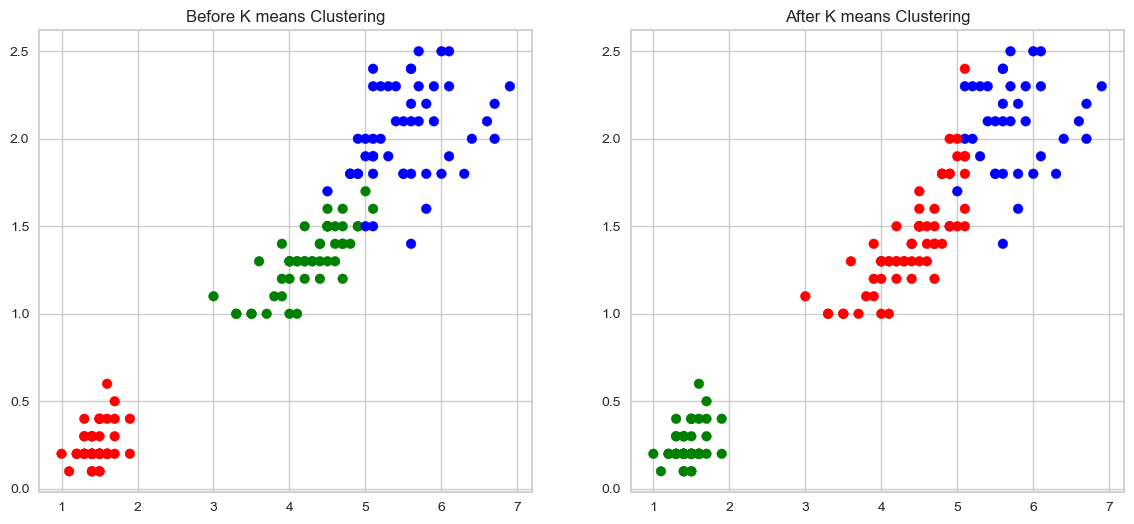

In [180]:
colors = np.array(['Red','Green','Blue'])
relabel = np.choose(kmeans_model.labels_,[2,1,0]).astype(np.int64)
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(X['petal length (cm)'],X['petal width (cm)'],c=colors[y['Actual_Cluster']])
plt.title('Before K means Clustering')

plt.subplot(1,2,2)
plt.scatter(X['petal length (cm)'],X['petal width (cm)'],c=colors[relabel])
plt.title('After K means Clustering')
